In [2]:
import os, shutil
original_dataset_dir= 'C:/Users/PyThOn DeV/Downloads/dogs-vs-cats/train'

In [3]:
base_dir= 'C:/Users/PyThOn DeV/Downloads/cat_vs_dog'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
>>> print('total train9ng cat images:', len(os.listdir(train_cats_dir)))


>>> print('total training dog images:', len(os.listdir(train_dogs_dir)))


>>> print('total validation cat images:', len(os.listdir(validation_cats_dir)))


>>> print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


>>> print('total test cat images:', len(os.listdir(test_cats_dir)))


>>> print('total test dog images:', len(os.listdir(test_dogs_dir)))


total train9ng cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [32]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
>>> for data_batch, labels_batch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('labels batch shape:', labels_batch.shape)
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 114s 1s/step - loss: 0.6882 - acc: 0.5390 - val_loss: 0.6988 - val_acc: 0.5670
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6561 - acc: 0.6105 - val_loss: 0.5831 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6231 - acc: 0.6590 - val_loss: 0.4419 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.5782 - acc: 0.6960 - val_loss: 0.5579 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5481 - acc: 0.7300 - val_loss: 0.6892 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5199 - acc: 0.7365 - val_loss: 0.6060 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4847 - acc: 0.7690 - val_loss: 0.6254 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 104s 1s/step - 

In [30]:
model.save('cat_vs_dog.h5')

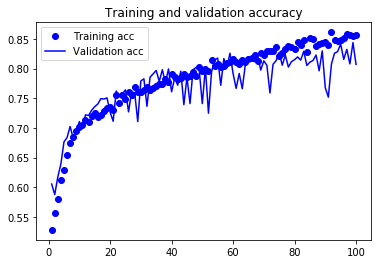

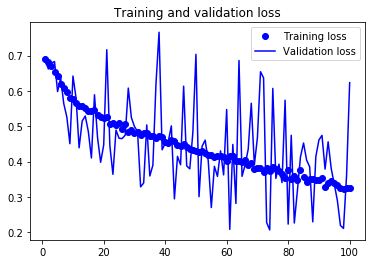

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

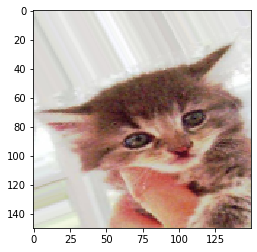

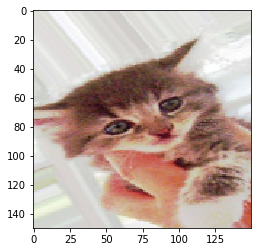

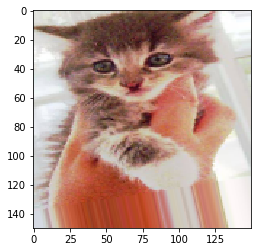

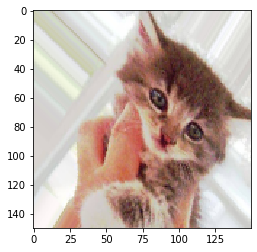

In [18]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(lr=1e-4),
                    metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 172s 2s/step - loss: 0.6915 - acc: 0.5280 - val_loss: 0.6865 - val_acc: 0.6053
Epoch 2/100
100/100 [==============================] - 170s 2s/step - loss: 0.6814 - acc: 0.5565 - val_loss: 0.6622 - val_acc: 0.5876
Epoch 3/100
100/100 [==============================] - 170s 2s/step - loss: 0.6694 - acc: 0.5799 - val_loss: 0.6790 - val_acc: 0.6174
Epoch 4/100
100/100 [==============================] - 170s 2s/step - loss: 0.6546 - acc: 0.6118 - val_loss: 0.6832 - val_acc: 0.6392
Epoch 5/100
100/100 [==============================] - 169s 2s/step - loss: 0.6412 - acc: 0.6294 - val_loss: 0.5982 - val_acc: 0.6764
Epoch 6/100
100/100 [==============================] - 170s 2s/step - loss: 0.6212 - acc: 0.6544 - val_loss: 0.6369 - val_acc: 0.6836
Epoch 7/100
100/100 [==============================] - 170s 2s/step - loss: 0.6074 - acc: 0.6743 - val_loss: 0.5

100/100 [==============================] - 240s 2s/step - loss: 0.4169 - acc: 0.8106 - val_loss: 0.2080 - val_acc: 0.7668
Epoch 62/100
100/100 [==============================] - 213s 2s/step - loss: 0.4137 - acc: 0.8075 - val_loss: 0.4485 - val_acc: 0.7919
Epoch 63/100
100/100 [==============================] - 202s 2s/step - loss: 0.4028 - acc: 0.8150 - val_loss: 0.2813 - val_acc: 0.7661
Epoch 64/100
100/100 [==============================] - 238s 2s/step - loss: 0.4030 - acc: 0.8119 - val_loss: 0.6862 - val_acc: 0.8073
Epoch 65/100
100/100 [==============================] - 232s 2s/step - loss: 0.3978 - acc: 0.8163 - val_loss: 0.3582 - val_acc: 0.8122
Epoch 66/100
100/100 [==============================] - 191s 2s/step - loss: 0.4016 - acc: 0.8176 - val_loss: 0.3908 - val_acc: 0.8177
Epoch 67/100
100/100 [==============================] - 184s 2s/step - loss: 0.3891 - acc: 0.8222 - val_loss: 0.4348 - val_acc: 0.8115
Epoch 68/100
100/100 [==============================] - 189s 2s/step

In [21]:
model.save('cat_vs_dog_1.h5')

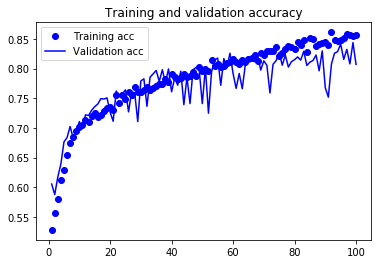

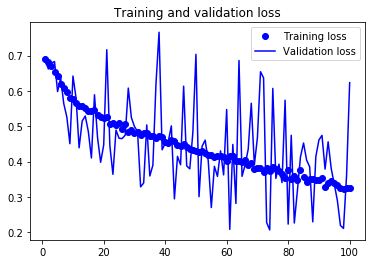

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()